In [1]:
from utils.data_validation import get_leakage_close_to_sensor, plot_leakages, get_index_anomaly, variance_plot, data_check, meshgrid_to_coords, data_plot, single_leakage_data_spread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import warnings
warnings.filterwarnings('ignore')

data, flows, single_leakage, double_leakage, mfc1, mfc2, mfc3, mfc4, mfc5, mfc6, mfc7, mfc8, mfc9, mfc10 = get_leakage_close_to_sensor(db_type = 'csv') 

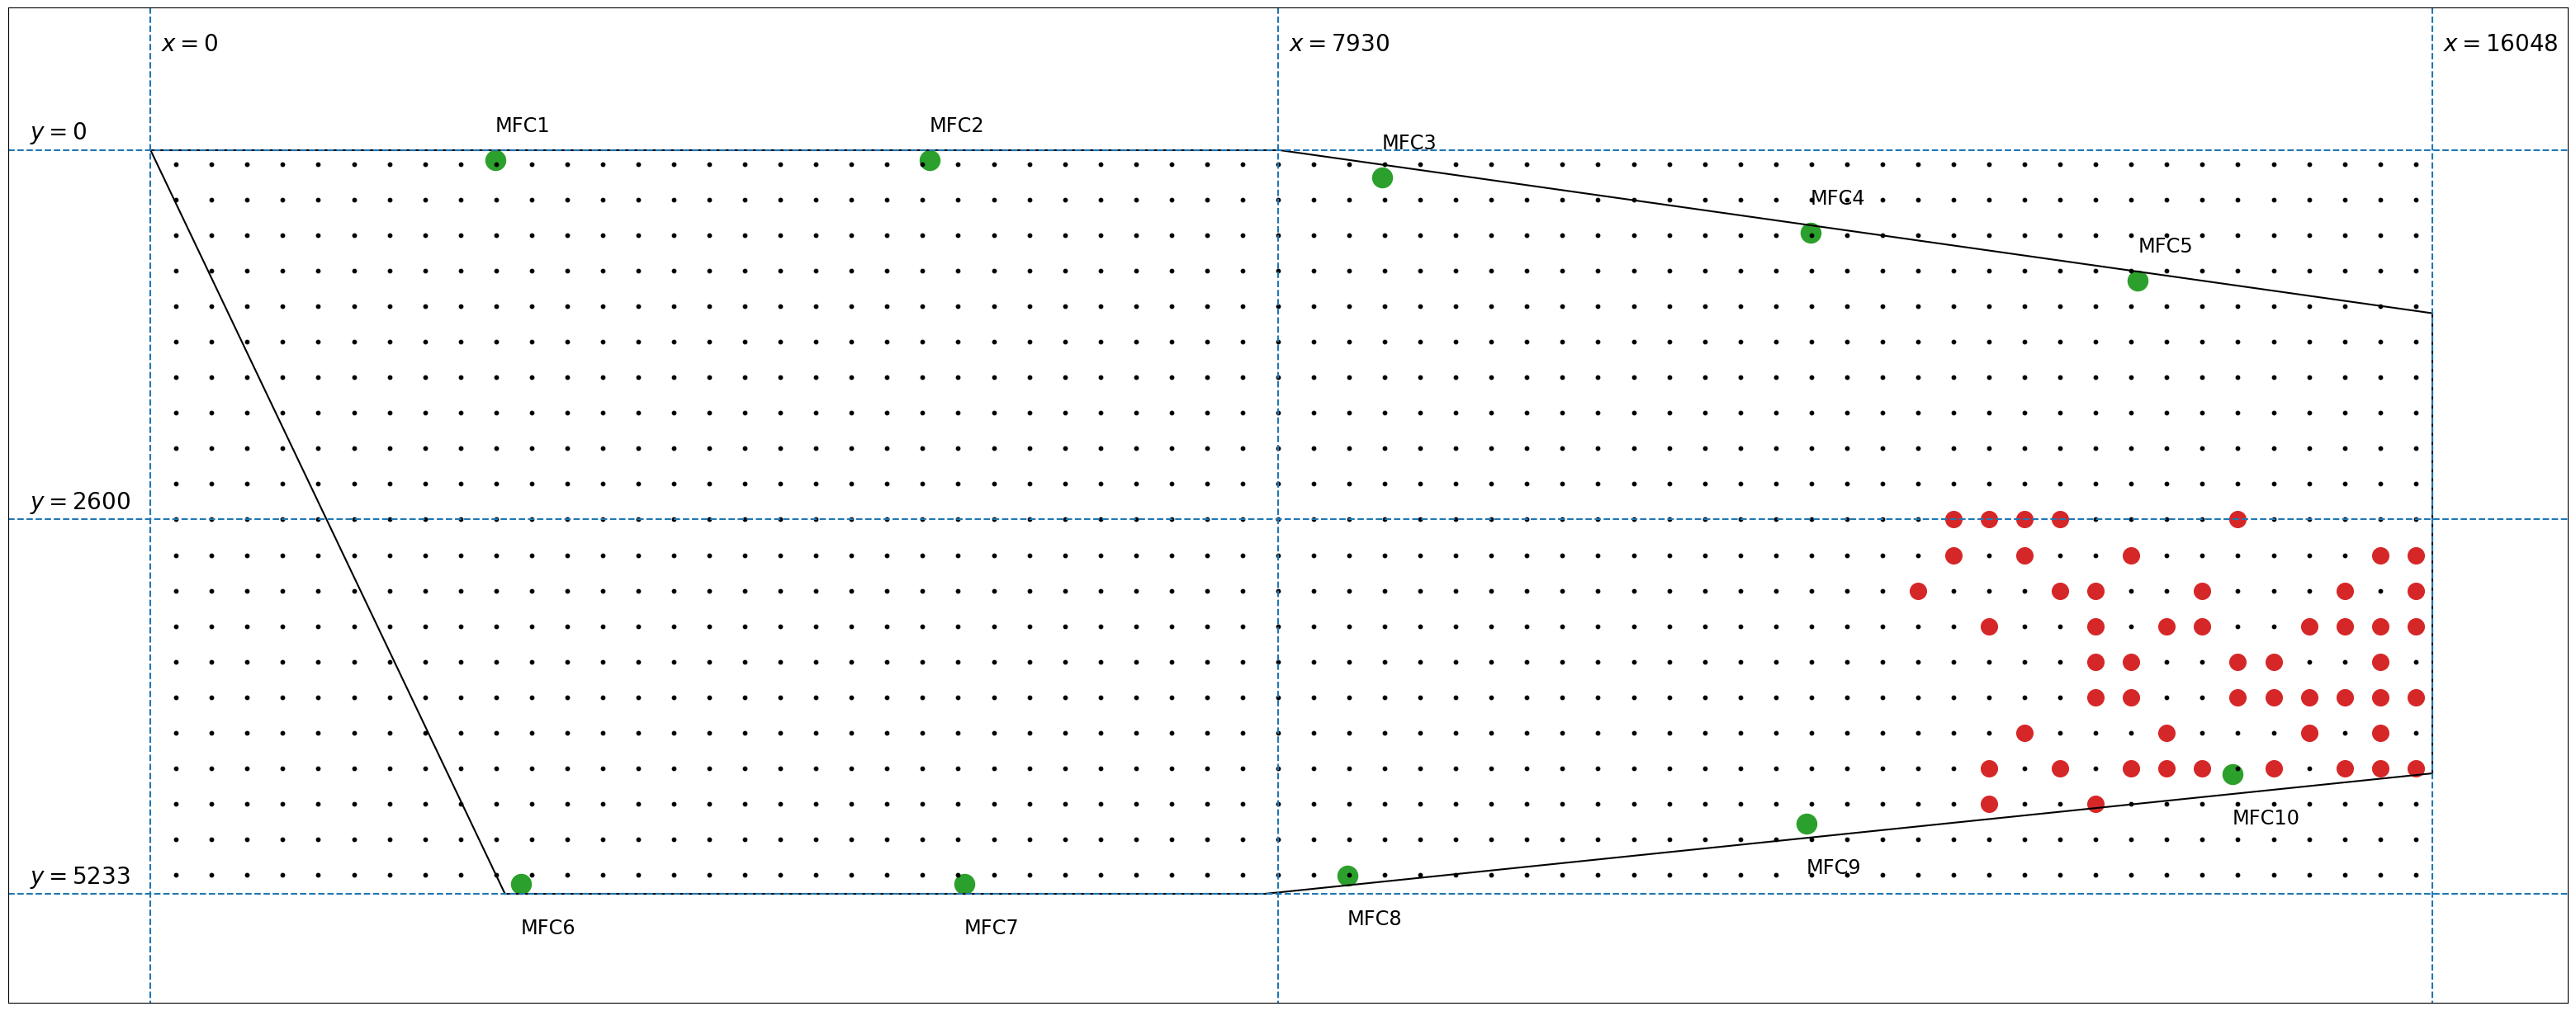

Empty DataFrame
Columns: [x1, y1, MFC6, MFC7, MFC8, MFC9, MFC10, MFC1, MFC2, MFC3, MFC4, MFC5, tot_residual_flow]
Index: []


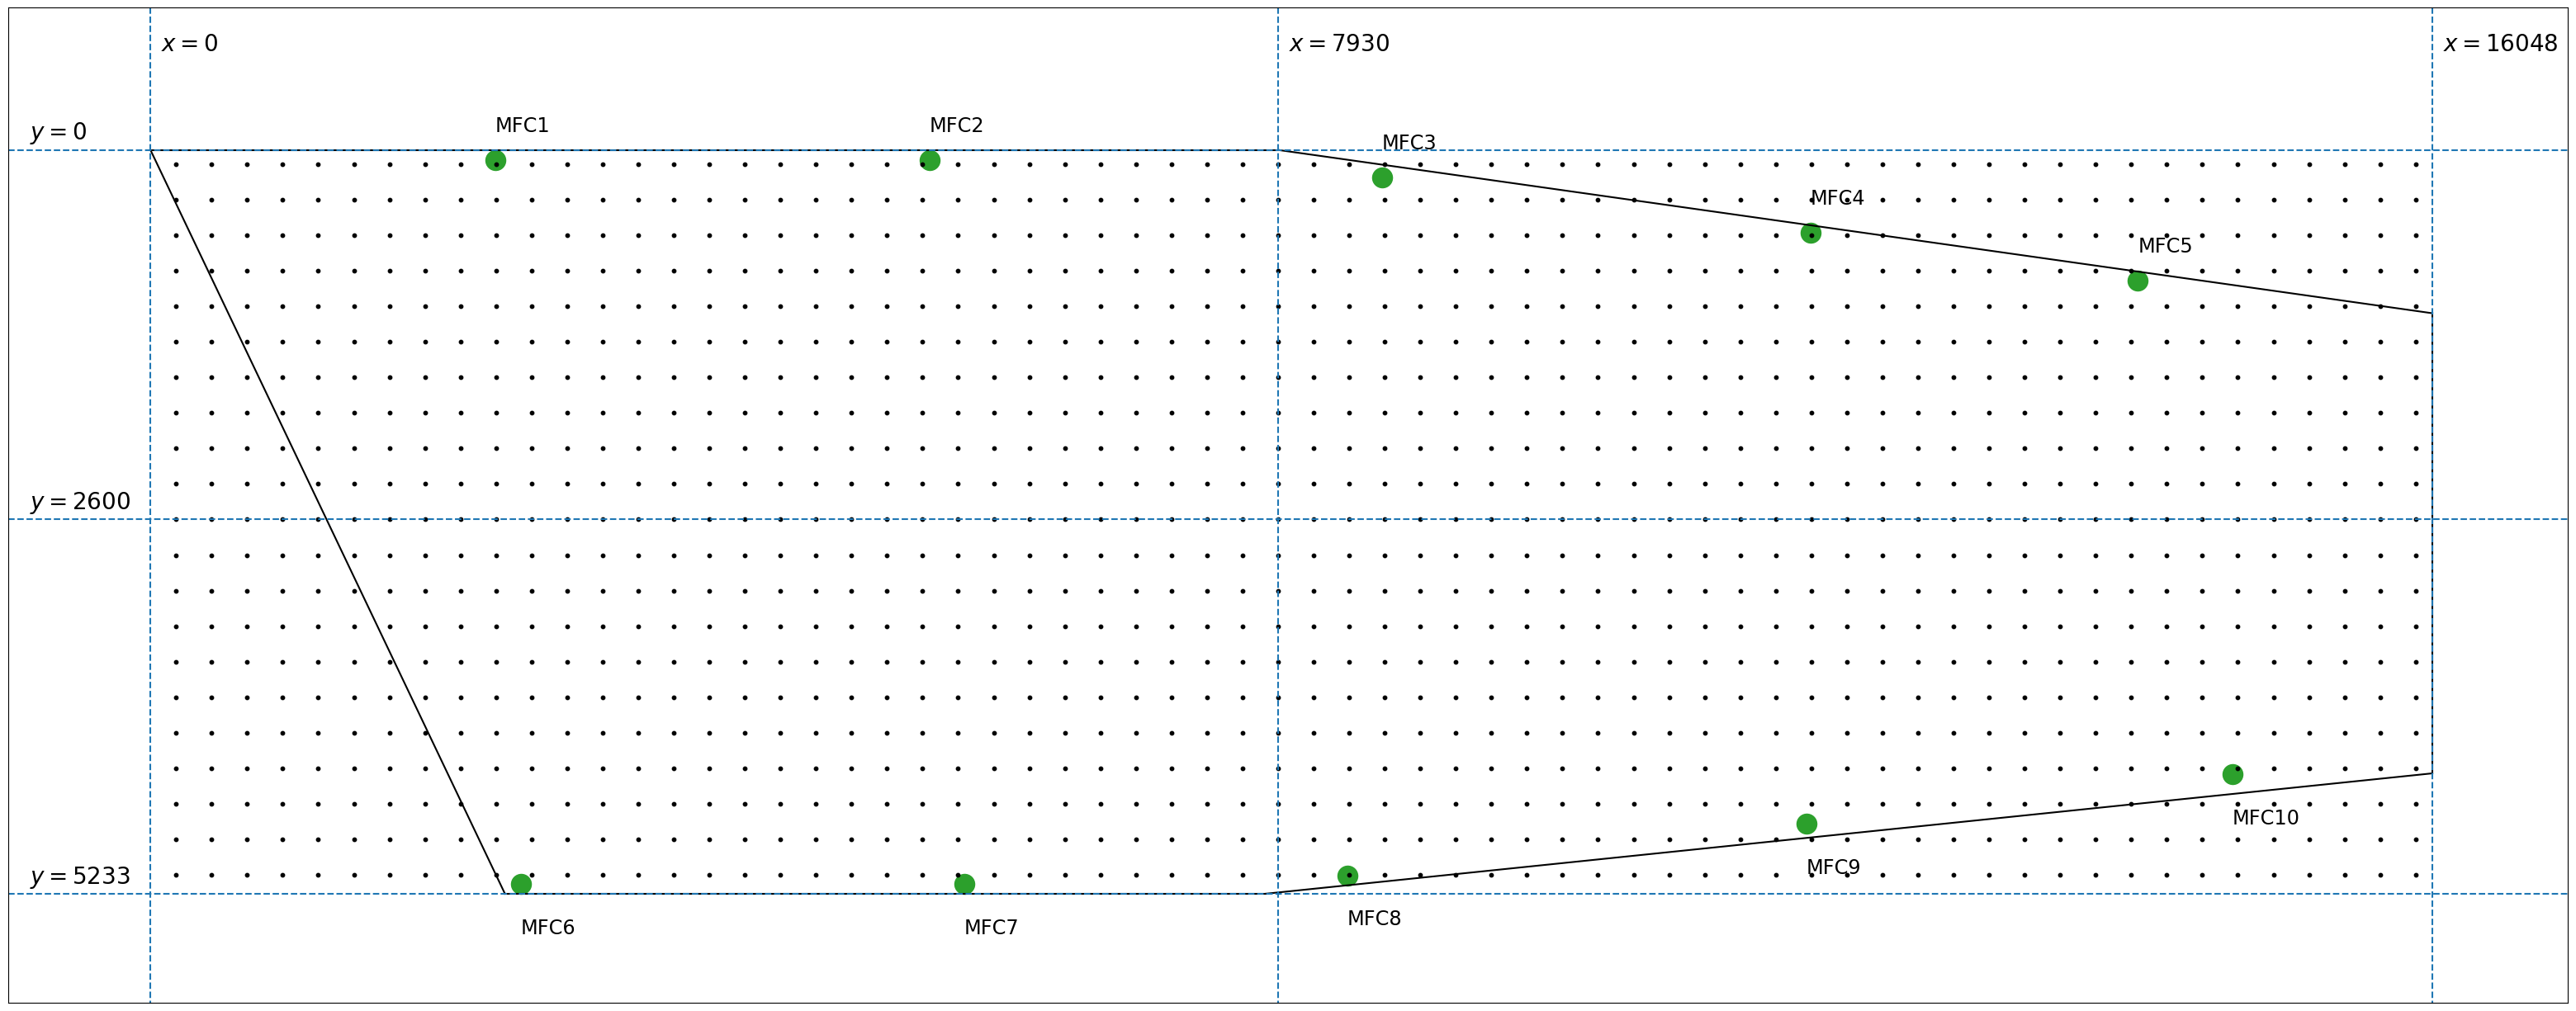

In [11]:
# Check 1 Here the values out of the domain are tagged as bad quality values and saved
mfc = mfc10
plot_leakages(mfc)
get_index_anomaly(mfc, 'x1', 7930, less=True)

# anomaly_single = [596, 84, 852, 32, 854, 572]
# for index in anomaly_single:
#     data.loc[index, 'quality'] = 'bad'
# data = data.drop(data[data.quality == 'bad'].index)
# data.to_csv('../data_acquisition/clean_data_check1.csv', index=True)

In [12]:
# check 2 - Total flow for both single leakage and double leakage must be less than a particular values. Larger values are filtered out in this stage
data = pd.read_csv('../data_acquisition/clean_data_check1.csv')
single_leakage = data[data['number_of_leakage'] == 1]
double_leakage = data[data['number_of_leakage'] == 2]
single_leakage = single_leakage[single_leakage['total flow rate'] <= 0.4]
# double_leakage['total flow rate'].describe()
double_leakage = double_leakage[double_leakage['total flow rate'] <= 0.8]

clean_data = pd.concat([single_leakage, double_leakage], axis=0)
clean_data = clean_data.set_index('sample_number')
clean_data = clean_data.sort_index()
# # clean_data.describe()
clean_data.to_csv('../data_acquisition/clean_data_check2_less.csv', index=True)

In [3]:
import seaborn as sns
%matplotlib inline



data, flows, single_leakage, double_leakage, mfc1, mfc2, mfc3, mfc4, mfc5, mfc6, mfc7, mfc8, mfc9, mfc10 = get_leakage_close_to_sensor(db_type = 'csv') 
# load the Auto dataset


In [4]:
single_leakage

,x1,y1,MFC6,MFC7,MFC8,MFC9,MFC10,MFC1,MFC2,MFC3,MFC4,MFC5
sample_number,,,,,,,,,,,,
0.0,11930.0,3100.0,0.0000,0.0169,0.0350,0.0995,0.0812,0.0000,0.0129,0.0306,0.0686,0.0620
2.0,930.0,100.0,0.0549,0.0412,0.0213,0.0124,0.0292,0.1815,0.0516,0.0213,0.0131,0.0090
4.0,9930.0,850.0,0.0187,0.0370,0.0554,0.0622,0.0574,0.0187,0.0404,0.1504,0.1399,0.0459
6.0,4930.0,2350.0,0.1090,0.1293,0.0684,0.0312,0.0367,0.1228,0.1433,0.0692,0.0306,0.0159
8.0,9180.0,4600.0,0.0235,0.0437,0.1338,0.0626,0.0442,0.0223,0.0292,0.0363,0.0341,0.0222
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,9430.0,850.0,0.0113,0.0233,0.0340,0.0320,0.0142,0.0125,0.0308,0.1168,0.0682,0.0202
NaN,8180.0,1100.0,0.0133,0.0303,0.0389,0.0289,0.0147,0.0158,0.0507,0.1198,0.0406,0.0170
NaN,9680.0,2100.0,0.0130,0.0298,0.0524,0.0531,0.0244,0.0136,0.0305,0.0732,0.0681,0.0297


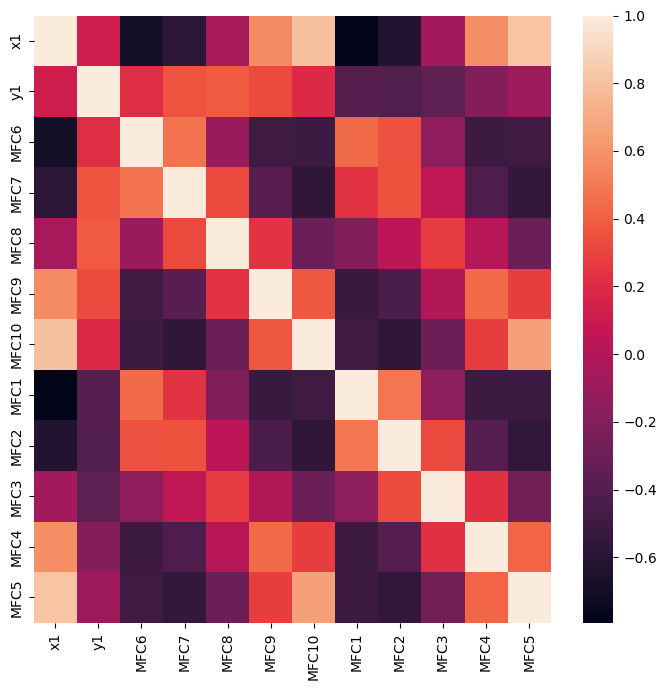

In [10]:
auto_df = single_leakage

# calculate the correlation matrix on the numeric columns
corr = auto_df.select_dtypes('number').corr()

plt.figure(figsize=(7, 7)) 
# plot the heatmap
heat_correlation_plot = sns.heatmap(corr)
fig = heat_correlation_plot.get_figure()
fig.tight_layout()
fig.savefig("heat_correlation_plot.png") 

In [ ]:
# clean_data = pd.read_csv('../data_acquisition/clean_data_check2.csv', index_col=0)
# clean_data = clean_data.drop(columns=['Comments', 'Day', 'quality'])
# single_leakage = clean_data[clean_data['number_of_leakage'] == 1].drop(columns=['number_of_leakage', 'x2', 'y2'])
# double_leakage = clean_data[clean_data['number_of_leakage'] == 2].drop(columns=['number_of_leakage'])